## 分析 泰坦尼克号 获救几率与特征之间的关系
* 性别
* 年龄
* 登船港口
* 家庭成员

所用工且包 pandas, searborn, numpy

In [84]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

sns.set_style('darkgrid')
%matplotlib inline


In [3]:
# 读入数据

df = pd.read_csv('titanic_train.csv')

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# 数据预处理
df['Age'] = df['Age'].fillna(df['Age'].median())

df['Embarked'] = df['Embarked'].dropna()


船舱等级 人数统计 



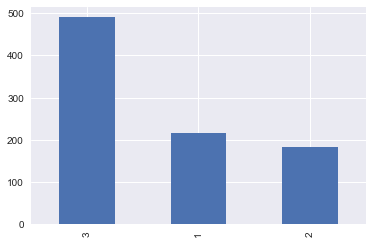

In [85]:
print """
船舱等级 人数统计 
"""

df['Pclass'].value_counts().plot(kind='bar')



年龄统计



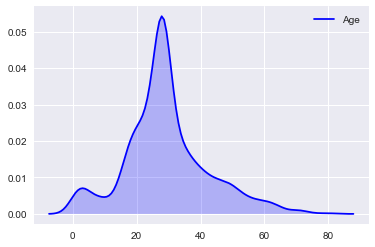

In [86]:
print """
年龄统计
"""
sns.kdeplot(data=df['Age'], shade=True, color='blue')

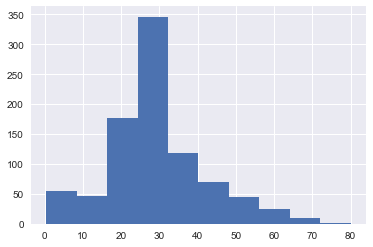

In [87]:
df['Age'].hist()


登船港口统计


可以看出:
Southampton: 72%
Cherbourg: 19%
Queenstown: 9%



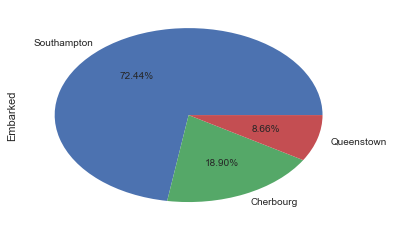

In [137]:
print """
登船港口统计
"""
df['Embarked'].value_counts().plot(kind='pie', autopct='%.2f%%', labels=["Southampton","Cherbourg","Queenstown"])

print """
可以看出:
Southampton: 72%
Cherbourg: 19%
Queenstown: 9%
"""


船票 统计

可以看出大部分人还是在 『经济舱』



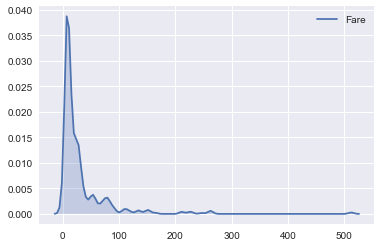

In [88]:
print """
船票 统计

可以看出大部分人还是在 『经济舱』
"""
sns.kdeplot(df['Fare'], shade=True)

## 港口与获救分析
* 可以看到： 在 Southampton 港口登船的乘客获救几率最高, 其次为 Cherbourg, 最低的是 Queenstown港口

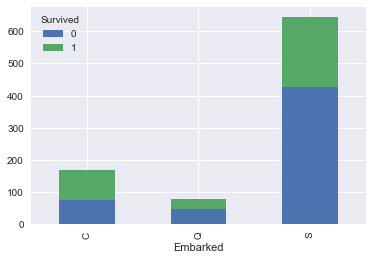

In [76]:
df.groupby(['Embarked', 'Survived']).size().unstack().plot(kind='bar', stacked=True)


   ## 获救比例
   
   约为 62%的乘客未能获救

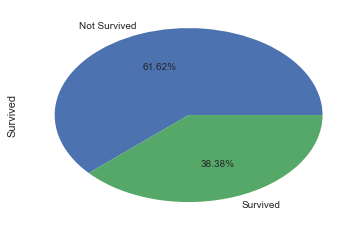

In [96]:
df['Survived'].value_counts().plot(kind='pie', autopct='%0.2f%%', labels=['Not Survived', 'Survived'])

## 性别与获救统计

事发之后，女性的获救比例远远大于男性

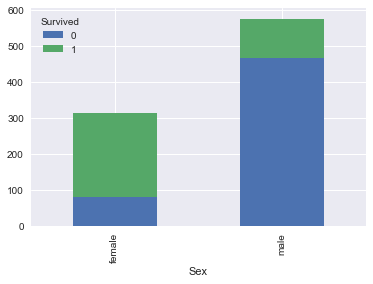

In [104]:
df.groupby(['Sex', 'Survived']).size().unstack().plot(kind='bar', stacked=True)

## 探索Survived与Pclass、Age的关系

### Pclass分组，求每个 等级的均值

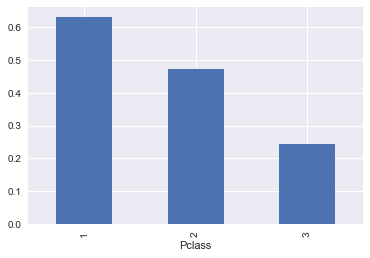

In [109]:
df.groupby(['Pclass'])['Survived'].mean().plot(kind='bar')

**分组，计数，重塑，画不同社会地位下获救与否的累计图**
* 一等舱的乘客 获救几率是最高的

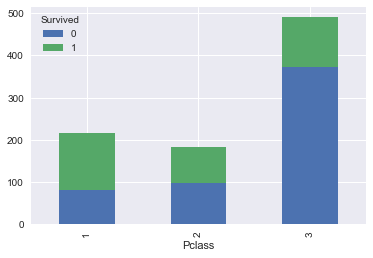

In [119]:
df.groupby(['Pclass', 'Survived'])['PassengerId'].count().unstack().plot(kind='bar', stacked=True)

## 探索 不能年龄段的人获救几率

**可以看出 小于 10岁的 获救几率是最高的 超过 50%**

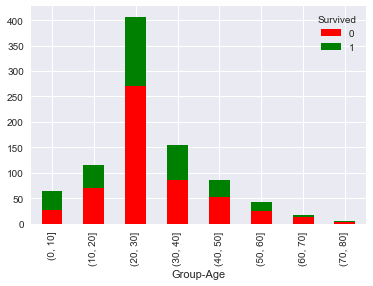

In [136]:
bins = np.arange(0, 90, 10)
df['Group-Age'] = pd.cut(df['Age'], bins)
df.groupby(['Group-Age', 'Survived'])['PassengerId'].count().unstack().plot(kind='bar', 
                                                                            stacked=True, color=['red', 'green'])

### 各种称谓 获救率

可以看出 
  * Miss 称谓 获救人数最多
  * Mrs 第二


In [150]:
import re
def get_title(name):
    groups = re.search(' ([A-Za-z]+)\.', name)
    if groups:
        return groups.group(1)
    return ''

df['Title'] = df['Name'].apply(get_title)

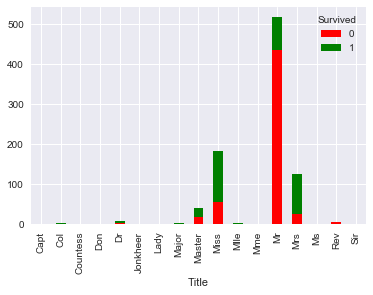

In [157]:
df.groupby(['Title', 'Survived']).size().unstack().fillna(0.0).plot(kind='bar', stacked=True, color=['red', 'green'])

# 总结

- 船上 20~40岁的人居多，占80%左右
- 船上72%的人来自 **Southampton** 港口

- 小孩与女性获救几率最高，说明优先救的是 小孩与女性，尤其是年轻女性居多(Miss称谓的)
- 来自 **Southampton** 港口的获救比例最高
- 一等舱与二等舱获救比例远大于三等舱，说明，遇到危险时富人的求生欲较强